In [1]:
from sklearn import tree
import numpy as np
import gdal
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readraster(file):
    dataSource = gdal.Open(file)
    band = dataSource.GetRasterBand(1)
    band = band.ReadAsArray()
    return(dataSource, band)

In [3]:
stateFiles1 = ["cbddist.tif","roaddist.tif","dda_2021_government_restricted.tif","den1991.tif","slope.tif","Actual_1994.tif"]
stateFiles2 = ["cbddist.tif","roaddist.tif","dda_2021_government_restricted.tif","den2001.tif","slope.tif","Actual_1999.tif"]
stateFiles = [stateFiles1,stateFiles2]
states = []
path = "data"
for i,files in enumerate(stateFiles):
    state = []
    for file in files:
        source,band = readraster(f"{path}/{file}")
        state.append(band)
    states.append(state)

newStates = []
for state in states:
    temp = np.array(state)
    temp = temp.transpose().reshape(-1,np.shape(temp)[0])
    newStates.append(temp)

In [4]:
clf = tree.DecisionTreeClassifier()

In [5]:
clf = clf.fit(newState[:,:-1], newState[:,-1])

[Text(251.4623294924314, 213.25846153846155, 'X[2] <= 8.0\ngini = 0.609\nsamples = 3525570\nvalue = [1856006, 303343, 222480, 13525, 1130216]'),
 Text(168.86581477357277, 204.89538461538461, 'X[0] <= 17500.0\ngini = 0.491\nsamples = 1669526\nvalue = [0, 303343, 222480, 13525, 1130178]'),
 Text(74.56886383123914, 196.53230769230768, 'X[3] <= 3256.5\ngini = 0.622\nsamples = 650730\nvalue = [0, 256059, 91281, 10157, 293233]'),
 Text(22.018359276899574, 188.16923076923078, 'X[2] <= 0.5\ngini = 0.508\nsamples = 135350\nvalue = [0, 24936, 21105, 131, 89178]'),
 Text(12.975809786324191, 179.80615384615385, 'X[0] <= 12500.0\ngini = 0.527\nsamples = 74453\nvalue = [0, 20391, 7623, 100, 46339]'),
 Text(6.131395188631862, 171.44307692307692, 'X[3] <= 1250.0\ngini = 0.605\nsamples = 32212\nvalue = [0, 10916, 4887, 74, 16335]'),
 Text(1.2778027945977621, 163.07999999999998, 'X[1] <= 750.0\ngini = 0.337\nsamples = 1403\nvalue = [0, 70, 189, 20, 1124]'),
 Text(0.1993023969640316, 154.71692307692308, 

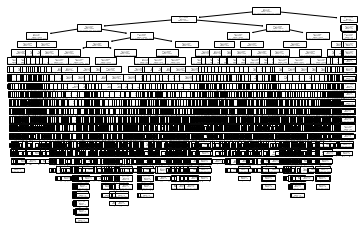

In [6]:
tree.plot_tree(clf) 

,0,1,2,3,4,5
0,1.000000,0.761995,-0.868737,0.372367,0.210047,0.862713
1,0.761995,1.000000,-0.615395,0.217754,0.142551,0.639022
2,-0.868737,-0.615395,1.000000,-0.623745,-0.239291,-0.882600
3,0.372367,0.217754,-0.623745,1.000000,0.146183,0.445442
4,0.210047,0.142551,-0.239291,0.146183,1.000000,0.214524
5,0.862713,0.639022,-0.882600,0.445442,0.214524,1.000000


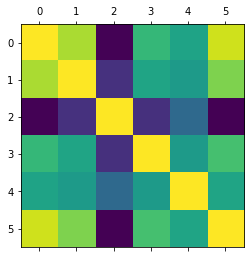

In [33]:
df = pd.DataFrame(newStates[0])
corr = df.corr()
plt.matshow(corr)
corr

,0,1,2,3,4,5
0,1.000000,0.761995,-0.868737,0.495425,0.210047,0.849277
1,0.761995,1.000000,-0.615395,0.311009,0.142551,0.639508
2,-0.868737,-0.615395,1.000000,-0.676698,-0.239291,-0.858952
3,0.495425,0.311009,-0.676698,1.000000,0.162548,0.510553
4,0.210047,0.142551,-0.239291,0.162548,1.000000,0.208135
5,0.849277,0.639508,-0.858952,0.510553,0.208135,1.000000


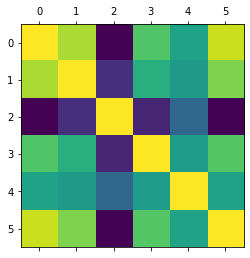

In [34]:
df = pd.DataFrame(newStates[1])
corr = df.corr()
plt.matshow(corr)
corr